In [1]:
import numpy as np 
import os 
import glob as glob 
import csv
import matplotlib.pyplot as plt 

In [2]:
train_subjects = [] 
with open("/home/fanxx/fxx/Fusion/Fusion_MRI_PET/data/train.csv" , "r") as f :
    train_subjects = f.readline().split(",")



In [6]:
from monai import transforms

def threshold_at_one(x):
    # threshold at 1
    return x > 0


train_transforms = transforms.Compose([
    transforms.CropForegroundd(keys=("mri","pet"),source_key="mri",select_fn=threshold_at_one, margin=0),
    transforms.SpatialPadd(keys=("mri","pet"),spatial_size=(224,224,224),method='symmetric', mode='constant') ,
    transforms.Resized(keys=("mri","pet"),spatial_size=(128,128,128)),
    transforms.RandRotated(keys=("mri","pet"),range_x=[0.2,0.2], prob=0.1, keep_size=True),
    transforms.RandRotated(keys=("mri","pet"),range_y=[0.2,0.2], prob=0.1, keep_size=True),
    transforms.RandRotated(keys=("mri","pet"),range_z=[0.2,0.2], prob=0.1, keep_size=True),
    transforms.RandAdjustContrastd(keys=("mri"),prob=0.5, gamma=(0.1, 2)), 
    transforms.RandGaussianNoised(keys=("mri"),prob=0.5,mean=0.5,std=0.1),
    # RandHistogramShift(prob=0.2 , )
    transforms.ScaleIntensityd(keys=("mri")),
])

In [7]:
from datasets import dataset

datasets = dataset(file_path="/home/fanxx/fxx/Fusion/Fusion_MRI_PET/preproce_data" , subject_names= train_subjects , transform= train_transforms)

/home/fanxx/anaconda3/envs/liulin/lib/python3.9/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.array LoadImage.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


/home/fanxx/fxx/Fusion/Fusion_MRI_PET/preproce_data/033_S_5198/033_S_5198_mri_MNI152.nii.gz
metatensor(1.7942)


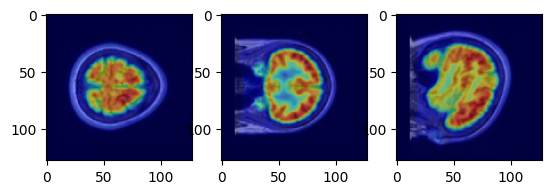

In [9]:
for data in datasets:
    mri = data[0]
    pet = data[1]
    print(pet.max())
    # mri2 = data["mri"][1]
    # print(mri2.keys())
    
    plt.subplot(131)
    plt.imshow(mri[0,:,:,91],"gray")
    plt.imshow(pet[0,:,:,91],"jet",alpha=0.5)
    plt.subplot(132)
    plt.imshow(mri[0,:,91,:],"gray")
    plt.imshow(pet[0,:,91,:],"jet",alpha=0.5)
    plt.subplot(133)
    plt.imshow(mri[0,91,:,:],"gray")
    plt.imshow(pet[0,91,:,:],"jet",alpha=0.5)

    # plt.savefig("/home/fanxx/fxx/Fusion/Fusion_MRI_PET/check_data/" + Subject_name + ".png")
    plt.show()
    # clear_output()
    break